In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

359509697.51952875, 179754848.75976437


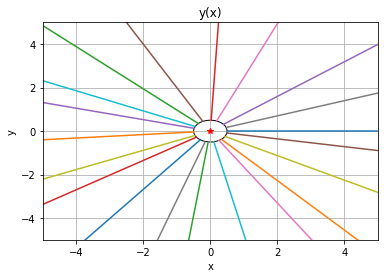

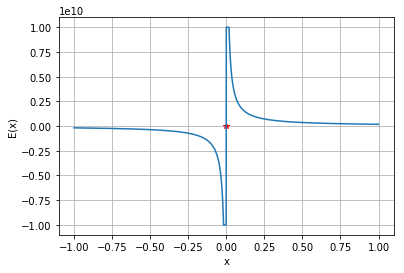

In [285]:
#1
x0 = 0
y0 = 0
q = 0.01
p = 0.5
B = [i for i in range(0,360,18)]
c = plt.Circle((x0, y0), radius=p, fill=False)
fig=plt.figure(1)
plt.grid()
plt.plot(x0,y0,"r*")
ax=fig.add_subplot(1,1,1)
plt.xlim(-5,5)
plt.ylim(-5,5)
ax.add_patch(c)
plt.xlabel("x")
plt.ylabel("y")
plt.title("y(x)")
for i in range(0,20):
    x = x0+p*math.cos(B[i])
    y = y0+p*math.sin(B[i])
    k = y/x
    if x <= 0:
        X = np.arange(-5,x,0.01)
        plt.plot(X,k*X)
    else:
        X = np.arange(x,5,0.01)
        plt.plot(X,k*X)
eps_0 = 8.854*10**-12
eps = 1
E = q/(4*math.pi*eps*eps_0*p**2)
P = q/(4*math.pi*eps*eps_0*p)
X = np.arange(-1, 1, 0.001)
Ex = []
for x in X:
    Exx = q/(4*math.pi*eps*eps_0*p*x)
    if Exx > 1e10: Exx = 1e10
    elif Exx < -1e10: Exx = -1e10
    Ex.append(Exx)
plt.figure(2)
plt.grid()
plt.xlabel("x")
plt.ylabel("E(x)")
plt.plot([0],[0],"r*")
plt.plot(X, Ex)
print(str(E)+", "+str(P))

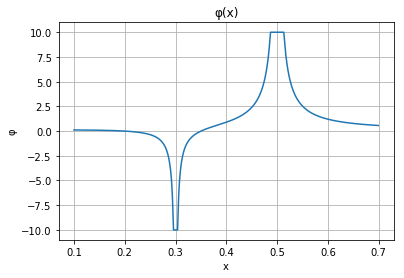

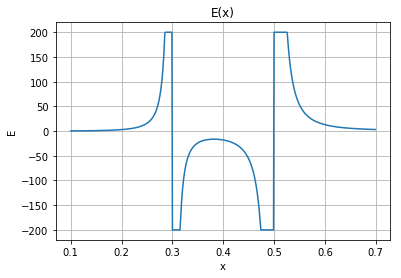

In [286]:
#2
k = 9e9

q1 = -5*1e-12
q2 = 15*1e-12

x1 = 0.3
x2 = 0.5

fi, E = [], []
X = np.arange(0.1,0.7,0.001)
for x in X:
    fi_ = k * q1/abs(x-x1) + k*q2/abs(x-x2)
    if fi_ > 10: fi_ = 10
    if fi_ < -10: fi_ = -10
    E_1 = k * abs(q1)/((x-x1)**2)
    E_2 = k * abs(q2)/((x-x2)**2)
    if q1 >= 0 and x < x1: E_1 = -E_1
    if q1 < 0 and x > x1: E_1 = -E_1
    if q2 >= 0 and x < x2: E_2 = -E_2
    if q2 < 0 and x > x2: E_2 = -E_2
    fi.append(fi_)
    E_ = E_1+E_2
    if E_ > 200: E_ = 200
    if E_ < -200: E_ = -200
    E.append(E_)
    x+=0.01
plt.figure(1)
plt.grid()
plt.xlabel("x")
plt.ylabel("φ")
plt.title("φ(x)")
plt.plot(X,fi)
plt.figure(2)
plt.grid()
plt.xlabel("x")
plt.ylabel("E")
plt.title("E(x)")
plt.plot(X,E)

Средняя относительная погрешность измерений =  1.018798256914682 %


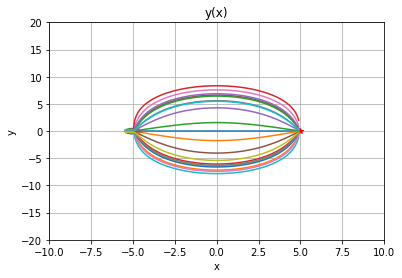

In [287]:
#3
x0 = 0
y0 = 0
a = 5
p = 0.5
q1 = -3
q2 = 3

B = [i for i in range(0,360,18)]
X = []
Y = []
plt.grid()
plt.plot([x0-a],[y0],"r*")
plt.plot([x0+a],[y0],"r*")
plt.ylim(-20, 20)
plt.xlim(-10, 10)
def f(x,y):
    r13=((x+a)**2+y**2)**(3/2);
    r23=((x-a)**2+y**2)**(3/2);
    z1=q1*y/r13+q2*y/r23;
    z2=q1*(x+a)/r13+q2*(x-a)/r23;
    return z1/z2
    
P = []
for i in range(0,len(B)):
    X = []
    Y = []
    dx = 2*a/100
    X = np.arange(x0-a, x0+a,dx)
    n = len(X)
    X[0]=(x0-a)+p*math.cos(B[i])
    Y.append(y0+p*math.sin(B[i]))
    for j in range(1,n):
        Y_ = Y[j-1]+dx*f(X[j-1],Y[j-1])
        Y.append(Y[j-1]+(dx/2)*(f(X[j-1], Y[j-1]) + f(X[j], Y_)))
        
        Y_temp = Y[j-1]+(dx/2)*f(X[j-1],Y[j-1])
        Y_h_2 = Y[j-1]+(dx/4)*(f(X[j-1], Y[j-1]) + f(X[j], Y_temp))
        if Y_h_2 != 0: P.append(abs(Y_h_2-Y_h)/abs(Y_h_2))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("y(x)")
    plt.plot(X,Y)
sr = sum(P)/len(P)
print("Средняя относительная погрешность измерений = ", sr, "%")

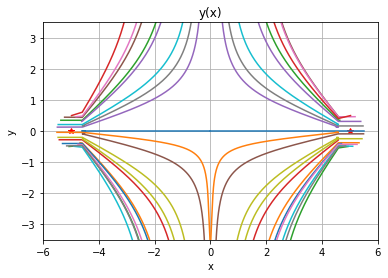

In [290]:
x0 = 0
y0 = 0
a = 5
p = 0.5
q1 = 3
q2 = 3

B = [i for i in range(0,360,18)]
X = []
Y = []
plt.grid()
plt.plot([x0-a],[y0],"r*")
plt.plot([x0+a],[y0],"r*")
plt.ylim(-3.5, 3.5)
plt.xlim(-6, 6)
def f(x,y):
    r13=((x+a)**2+y**2)**(3/2);
    r23=((x-a)**2+y**2)**(3/2);
    z1=q1*y/r13+q2*y/r23;
    z2=q1*(x+a)/r13+q2*(x-a)/r23;
    r = 20
    l = -20
    if z2 == 0: return r
    res = z1/z2
    if res > r: res = r
    elif res < l: res = l
    return res
for i in range(0,len(B)):
    X = []
    Y = []
    dx = 2*a/1000
    X = np.arange(x0-a+0.4, 0+dx,dx)
    n = len(X)
    X[0]=(x0-a)+p*math.cos(B[i])
    Y.append(y0+p*math.sin(B[i]))
    for j in range(1,n):
        Y_ = Y[j-1]+dx*f(X[j-1],Y[j-1])
        Y.append(Y[j-1]+(dx/2)*(f(X[j-1], Y[j-1]) + f(X[j], Y_)))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("y(x)")
    plt.plot(X,Y)
for i in range(0,len(B)):
    X = []
    Y = []
    dx = -2*a/1000
    X = np.arange(x0+a-0.4, 0+dx,dx)
    n = len(X)
    X[0]=(x0+a)+p*math.cos(B[i])
    Y.append(y0+p*math.sin(B[i]))
    for j in range(1,n):
        Y_ = Y[j-1]+dx*f(X[j-1],Y[j-1])
        Y.append(Y[j-1]+(dx/2)*(f(X[j-1], Y[j-1]) + f(X[j], Y_)))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("y(x)")
    plt.plot(X,Y)

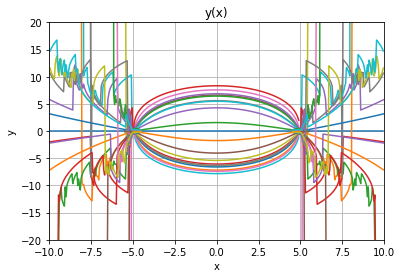

In [291]:
#3
x0 = 0
y0 = 0
a = 5
p = 0.5
q1 = -3
q2 = 3

B = [i for i in range(0,360,18)]
X = []
Y = []
plt.grid()
plt.plot([x0-a],[y0],"r*")
plt.plot([x0+a],[y0],"r*")
plt.ylim(-20, 20)
plt.xlim(-10, 10)
def f(x,y):
    r13=((x+a)**2+y**2)**(3/2);
    r23=((x-a)**2+y**2)**(3/2);
    z1=q1*y/r13+q2*y/r23;
    z2=q1*(x+a)/r13+q2*(x-a)/r23;
    return z1/z2
    
for i in range(0,len(B)):
    X = []
    Y = []
    dx = 2*a/100
    X = np.arange(x0-a, x0+a,dx)
    n = len(X)
    X[0]=(x0-a)+p*math.cos(B[i])
    Y.append(y0+p*math.sin(B[i]))
    for j in range(1,n):
        Y_ = Y[j-1]+dx*f(X[j-1],Y[j-1])
        Y.append(Y[j-1]+(dx/2)*(f(X[j-1], Y[j-1]) + f(X[j], Y_)))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("y(x)")
    plt.plot(X,Y)
for i in range(0,len(B)):
    X = []
    Y = []
    dx=(10-(x0+a))/100
    X = np.arange(x0+a, 10, dx)
    n = len(X)
    X[0]=(x0+a)+p*math.cos(B[i])
    Y.append(y0+p*math.sin(B[i]))
    h = (max(X)-min(X))/n
    for j in range(1,n):
        Y_ = Y[j-1]+dx*f(X[j-1],Y[j-1])
        Y.append(Y[j-1]+(dx/2)*(f(X[j-1], Y[j-1]) + f(X[j], Y_)))
    plt.plot(X,Y)
for i in range(0,len(B)):
    X = []
    Y = []
    dx=(-10-(x0-a))/100
    X = np.arange(x0-a, -10, dx)
    n = len(X)
    X[0]=(x0-a)-p*math.cos(B[i])
    Y.append(y0+p*math.sin(B[i]))
    h = (min(X)-max(X))/n
    for j in range(1,n):
        Y_ = Y[j-1]+dx*f(X[j-1],Y[j-1])
        Y.append(Y[j-1]+(dx/2)*(f(X[j-1], Y[j-1]) + f(X[j], Y_)))
    plt.plot(X,Y)